# Steel plates fault classification

## Data Exploration

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as ses
import numpy as np
from numpy import corrcoef

In [2]:
pip install openpyxl

     |████████████████████████████████| 242 kB 3.1 MB/s            
Note: you may need to restart the kernel to use updated packages.


In [3]:
pd.options.display.max_columns = None

In [4]:
df = pd.read_excel('../input/steel-plates-fault-dataset/Steel Plates Fault Dataset.xlsx',header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33
0,42,50,270900,270944,267,17,44,24220,76,108,1687,1,0,80,0.0498,0.2415,0.1818,0.0047,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,1687,1,0,80,0.7647,0.3793,0.2069,0.0036,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,1623,1,0,100,0.9710,0.3426,0.3333,0.0037,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,1353,0,1,290,0.7287,0.4413,0.1556,0.0052,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,1353,0,1,185,0.0695,0.4486,0.0662,0.0126,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1896,249,277,325780,325796,273,54,22,35033,119,141,1360,0,1,40,0.3662,0.3906,0.5714,0.0206,0.5185,0.7273,0.0,2.4362,1.4472,1.2041,-0.4286,0.0026,0.7254,0,0,0,0,0,0,1
1897,144,175,340581,340598,287,44,24,34599,112,133,1360,0,1,40,0.2118,0.4554,0.5484,0.0228,0.7046,0.7083,0.0,2.4579,1.4914,1.2305,-0.4516,-0.0582,0.8173,0,0,0,0,0,0,1
1898,145,174,386779,386794,292,40,22,37572,120,140,1360,0,1,40,0.2132,0.3287,0.5172,0.0213,0.7250,0.6818,0.0,2.4654,1.4624,1.1761,-0.4828,0.0052,0.7079,0,0,0,0,0,0,1
1899,137,170,422497,422528,419,97,47,52715,117,140,1360,0,1,40,0.2015,0.5904,0.9394,0.0243,0.3402,0.6596,0.0,2.6222,1.5185,1.4914,-0.0606,-0.0171,0.9919,0,0,0,0,0,0,1


In [5]:
# Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1901 entries, 0 to 1900
Data columns (total 34 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1901 non-null   int64  
 1   1       1901 non-null   int64  
 2   2       1901 non-null   int64  
 3   3       1901 non-null   int64  
 4   4       1901 non-null   int64  
 5   5       1901 non-null   int64  
 6   6       1901 non-null   int64  
 7   7       1901 non-null   int64  
 8   8       1901 non-null   int64  
 9   9       1901 non-null   int64  
 10  10      1901 non-null   int64  
 11  11      1901 non-null   int64  
 12  12      1901 non-null   int64  
 13  13      1901 non-null   int64  
 14  14      1901 non-null   float64
 15  15      1901 non-null   float64
 16  16      1901 non-null   float64
 17  17      1901 non-null   float64
 18  18      1901 non-null   float64
 19  19      1901 non-null   float64
 20  20      1901 non-null   float64
 21  21      1901 non-null   float64
 22  

In [6]:
# Convert columns 0 to 13 from intger to float
df.loc[:,:13] = df.loc[:,:13].astype('float64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1901 entries, 0 to 1900
Data columns (total 34 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1901 non-null   float64
 1   1       1901 non-null   float64
 2   2       1901 non-null   float64
 3   3       1901 non-null   float64
 4   4       1901 non-null   float64
 5   5       1901 non-null   float64
 6   6       1901 non-null   float64
 7   7       1901 non-null   float64
 8   8       1901 non-null   float64
 9   9       1901 non-null   float64
 10  10      1901 non-null   float64
 11  11      1901 non-null   float64
 12  12      1901 non-null   float64
 13  13      1901 non-null   float64
 14  14      1901 non-null   float64
 15  15      1901 non-null   float64
 16  16      1901 non-null   float64
 17  17      1901 non-null   float64
 18  18      1901 non-null   float64
 19  19      1901 non-null   float64
 20  20      1901 non-null   float64
 21  21      1901 non-null   float64
 22  

In [7]:
# Check for missing values
pd.DataFrame(df.isna().sum(),columns=['Missing values'])

,Missing values
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [8]:
df.shape

(1901, 34)

In [9]:
# Split the data into independant(x) and dependant(y) variables dataframes for base-model
df_x = df.loc[:,0:26]
df_y = df.loc[:,27:33]

In [10]:
# Print the unique values of the lables
print(df_y[27].unique())
print(df_y[28].unique())
print(df_y[29].unique())
print(df_y[30].unique())
print(df_y[31].unique())
print(df_y[32].unique())
print(df_y[33].unique())

[1 0]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]


In [11]:
df_x.shape, df_y.shape

((1901, 27), (1901, 7))

## Data preparation

In [12]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [13]:
# Split the labels into their own groups
df_27 = df[27].loc[df[27]==1]
df_28 = df[28].loc[df[28]==1]
df_29 = df[29].loc[df[29]==1]
df_30 = df[30].loc[df[30]==1]
df_31 = df[31].loc[df[31]==1]
df_32 = df[32].loc[df[32]==1]
df_33 = df[33].loc[df[33]==1]

# Change the labling to 1 to 7 that corresponds to labels from 27 to 33
df_28 = df_28.where(df_28!=1, 2,axis=0)
df_29 = df_29.where(df_29!=1, 3,axis=0)
df_30 = df_30.where(df_30!=1, 4,axis=0)
df_31 = df_31.where(df_31!=1, 5,axis=0)
df_32 = df_32.where(df_32!=1, 6,axis=0)
df_33 = df_33.where(df_33!=1, 7,axis=0)
frames = [df_27,df_28,df_29,df_30,df_31,df_32,df_33] # With group 7
y = pd.concat(frames)

In [14]:
scaler = MinMaxScaler()
#scaler = StandardScaler()
x = scaler.fit_transform(df_x)
x.shape, y.shape

((1901, 27), (1901,))

In [15]:
pd.DataFrame(y.value_counts())

,0
7,668
6,397
3,386
2,185
1,148
4,67
5,50


In [16]:
# Test the correlation between independant and dependant variables
def bulk_correlation(df_x,df_y):
    '''Print the correlation cofficitn of each attribute in the dataset'''
    corr_df = pd.DataFrame(columns=['Attribute','Score'])
    y = df_y
    # Dependant variable is object/string type
    if y.dtype == 'O':
        y = df_y.astype('category').cat.codes
    if not isinstance(df_x, pd.DataFrame):
        df_x = pd.DataFrame(df_x)
        for column in df_x:
            # Independant variable type is object/string
            x = df_x[column]
            if x.dtype == 'O':
                x = df_x[column].astype('category').cat.codes
            corr_score = corrcoef(x,y)
            corr_score = corr_score[0,1]
            corr_df = corr_df.append({'Attribute':column,'Score':corr_score},ignore_index=True)
            
        return corr_df.sort_values(by='Score',ascending=False,axis=0)

In [17]:
bulk_correlation(x,y)

,Attribute,Score
8,8.0,0.305925
0,0.0,0.293502
14,14.0,0.278379
1,1.0,0.269676
13,13.0,0.267618
18,18.0,0.225182
10,10.0,0.217283
19,19.0,0.149536
11,11.0,0.103368
16,16.0,0.096095


## Model training

In [18]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC

In [19]:
# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=10,test_size=0.20)

In [20]:
y_test

1619    7
1778    7
1173    6
1869    7
299     2
       ..
87      1
1394    7
1160    6
1586    7
861     6
Length: 381, dtype: int64

In [21]:
print(f'x train{x_train.shape}')
print(f'y train {y_train.shape}')
print(f'x test{x_test.shape}')
print(f'y test{y_test.shape}')

x train(1520, 27)
y train (1520,)
x test(381, 27)
y test(381,)


### Model 1 | Base-model

In [22]:
svc = SVC(kernel='rbf')
svc_paramenters = {'C':[0.1,1,10,20,100],
                   'gamma':[0.1,1,10,100]}
svm_model_1 = GridSearchCV(svc,param_grid=svc_paramenters,return_train_score=True,cv=10,scoring='accuracy')
svm_model_1.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 20, 100],
                         'gamma': [0.1, 1, 10, 100]},
             return_train_score=True, scoring='accuracy')

In [23]:
print(f'''Best parameters{svm_model_1.best_params_}
Best score {svm_model_1.best_score_}''')

Best parameters{'C': 10, 'gamma': 1}
Best score 0.7657894736842106


### Results

In [24]:
from sklearn.metrics import plot_confusion_matrix

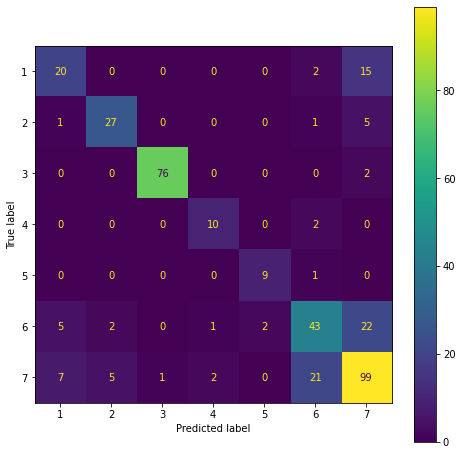

In [25]:
#plt.style.use('_classic_test_patch')
fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(svm_model_1,x_test,y_test,ax=ax)
plt.savefig('base_model_confusion_matrix.png')
plt.show()

### Testing the accuracy of another machine learning algorthim

In [26]:
# Testing with a different algorithm
from sklearn.tree import DecisionTreeClassifier

In [27]:
decision_tree_clf = DecisionTreeClassifier()
decision_tree_scores = cross_val_score(decision_tree_clf, x_train, y_train, cv=12)
decision_tree_clf.fit(x,y)
decision_tree_scores.mean()

0.7045525559305088

## Model 2 | Wihtout fault group 7

In [28]:
df = pd.read_excel('../input/steel-plates-fault-dataset/Steel Plates Fault Dataset.xlsx',header=None)

In [29]:
# Remove fault group 7
df = df.loc[df[33]!=1] # Remove smaples with fault group 7
df = df.loc[:,:32] # Remove fault group 7
df_x = df.loc[:,0:26]
df_y = df.loc[:,27:32]

In [30]:
# Split the data into independant(x) and dependant(y) variables dataframes without group 7
df_x = df.loc[:,0:26]
df_y = df.loc[:,27:32]

In [31]:
scaler = MinMaxScaler()
x = scaler.fit_transform(df_x)
x.shape

(1233, 27)

In [32]:
# Split the labels into their own groups
df_27 = df[27].loc[df[27]==1]
df_28 = df[28].loc[df[28]==1]
df_29 = df[29].loc[df[29]==1]
df_30 = df[30].loc[df[30]==1]
df_31 = df[31].loc[df[31]==1]
df_32 = df[32].loc[df[32]==1]

# Change the labling to 1 to 6 that corresponds to labels from 27 to 32
df_28 = df_28.where(df_28!=1, 2,axis=0)
df_29 = df_29.where(df_29!=1, 3,axis=0)
df_30 = df_30.where(df_30!=1, 4,axis=0)
df_31 = df_31.where(df_31!=1, 5,axis=0)
df_32 = df_32.where(df_32!=1, 6,axis=0)
frames = [df_27,df_28,df_29,df_30,df_31,df_32]
y = pd.concat(frames)

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=10,test_size=0.20)

In [34]:
svc = SVC(kernel='rbf')
svc_paramenters = {'C':[0.1,1,10,20,100],
                   'gamma':[0.1,1,10,100]}
svm_model_2 = GridSearchCV(svc,param_grid=svc_paramenters,return_train_score=True,cv=10,scoring='accuracy')
svm_model_2.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 20, 100],
                         'gamma': [0.1, 1, 10, 100]},
             return_train_score=True, scoring='accuracy')

In [35]:
print(f'''Best parameters{svm_model_2.best_params_}
Best score {svm_model_2.best_score_}''')

Best parameters{'C': 10, 'gamma': 1}
Best score 0.9005875077303648


### Results

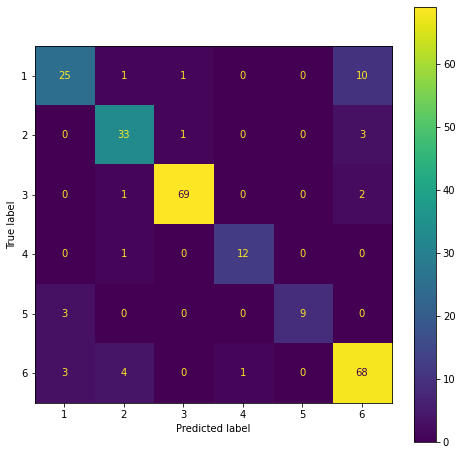

In [36]:
fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(svm_model_2,x_test,y_test,ax=ax)
plt.savefig('model_2_confusion_matrix.png')
plt.show()

### Model 3 | Binary classification for fault Group 7 

In [37]:
df = pd.read_excel('../input/steel-plates-fault-dataset/Steel Plates Fault Dataset.xlsx',header=None)

In [38]:
df = df.drop(columns=[27,28,29,30,31,32])
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,33
0,42,50,270900,270944,267,17,44,24220,76,108,1687,1,0,80,0.0498,0.2415,0.1818,0.0047,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,1687,1,0,80,0.7647,0.3793,0.2069,0.0036,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,1623,1,0,100,0.9710,0.3426,0.3333,0.0037,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,0
3,853,860,369370,369415,176,13,45,18996,99,126,1353,0,1,290,0.7287,0.4413,0.1556,0.0052,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,1353,0,1,185,0.0695,0.4486,0.0662,0.0126,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1896,249,277,325780,325796,273,54,22,35033,119,141,1360,0,1,40,0.3662,0.3906,0.5714,0.0206,0.5185,0.7273,0.0,2.4362,1.4472,1.2041,-0.4286,0.0026,0.7254,1
1897,144,175,340581,340598,287,44,24,34599,112,133,1360,0,1,40,0.2118,0.4554,0.5484,0.0228,0.7046,0.7083,0.0,2.4579,1.4914,1.2305,-0.4516,-0.0582,0.8173,1
1898,145,174,386779,386794,292,40,22,37572,120,140,1360,0,1,40,0.2132,0.3287,0.5172,0.0213,0.7250,0.6818,0.0,2.4654,1.4624,1.1761,-0.4828,0.0052,0.7079,1
1899,137,170,422497,422528,419,97,47,52715,117,140,1360,0,1,40,0.2015,0.5904,0.9394,0.0243,0.3402,0.6596,0.0,2.6222,1.5185,1.4914,-0.0606,-0.0171,0.9919,1


In [39]:
df[33].value_counts()

0    1233
1     668
Name: 33, dtype: int64

In [40]:
df_x = df.loc[:,:26]
y = df.loc[:,32:33]

In [41]:
scaler = MinMaxScaler()
x = scaler.fit_transform(df_x)

In [42]:
x.shape, y.shape

((1901, 27), (1901, 1))

In [43]:
y.value_counts()

33
0     1233
1      668
dtype: int64

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=10,test_size=0.20,stratify=y)

In [45]:
y_train = np.ravel(y_train)

In [46]:
svc = SVC(kernel='rbf')
svc_paramenters = {'C':[0.1,1,10,20,100],
                   'gamma':[0.1,1,10,100]}
svm_model_3 = GridSearchCV(svc,param_grid=svc_paramenters,return_train_score=True,cv=10,scoring='accuracy')
svm_model_3.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 20, 100],
                         'gamma': [0.1, 1, 10, 100]},
             return_train_score=True, scoring='accuracy')

In [47]:
print(f'''Best parameters{svm_model_3.best_params_}
Best score {svm_model_3.best_score_}''')

Best parameters{'C': 100, 'gamma': 0.1}
Best score 0.7888157894736841


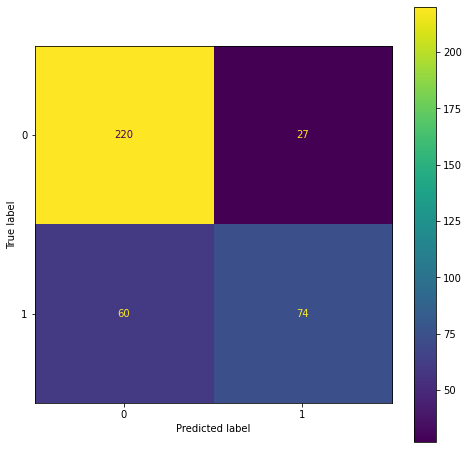

In [48]:
fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(svm_model_3,x_test,y_test,ax=ax)
plt.savefig('model_3_confusion_matrix.png')
plt.show()

# Prediction

In [49]:
df_predict = pd.read_excel('../input/steel-samples-prediction/New Samples.xlsx',header=None)
df_predict.shape

(40, 27)

In [50]:
df_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       40 non-null     int64  
 1   1       40 non-null     int64  
 2   2       40 non-null     int64  
 3   3       40 non-null     int64  
 4   4       40 non-null     int64  
 5   5       40 non-null     int64  
 6   6       40 non-null     int64  
 7   7       40 non-null     int64  
 8   8       40 non-null     int64  
 9   9       40 non-null     int64  
 10  10      40 non-null     int64  
 11  11      40 non-null     int64  
 12  12      40 non-null     int64  
 13  13      40 non-null     int64  
 14  14      40 non-null     float64
 15  15      40 non-null     float64
 16  16      40 non-null     float64
 17  17      40 non-null     float64
 18  18      40 non-null     float64
 19  19      40 non-null     float64
 20  20      40 non-null     float64
 21  21      40 non-null     float64
 22  22  

In [51]:
df_predict = df_predict.astype('float')
scaler = MinMaxScaler()
y_pred = scaler.fit_transform(df_predict)

In [52]:
df_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       40 non-null     float64
 1   1       40 non-null     float64
 2   2       40 non-null     float64
 3   3       40 non-null     float64
 4   4       40 non-null     float64
 5   5       40 non-null     float64
 6   6       40 non-null     float64
 7   7       40 non-null     float64
 8   8       40 non-null     float64
 9   9       40 non-null     float64
 10  10      40 non-null     float64
 11  11      40 non-null     float64
 12  12      40 non-null     float64
 13  13      40 non-null     float64
 14  14      40 non-null     float64
 15  15      40 non-null     float64
 16  16      40 non-null     float64
 17  17      40 non-null     float64
 18  18      40 non-null     float64
 19  19      40 non-null     float64
 20  20      40 non-null     float64
 21  21      40 non-null     float64
 22  22  

In [53]:
def convert_to_int(y):
    '''Convert binary values to intger for model 3'''
    new_pred_3 = []
    for value in y:
        if value == 1:
            new_pred_3.append(7)
        else:
            new_pred_3.append(0)
    return np.asarray(new_pred_3)

In [54]:
# Predict
pl_1 = svm_model_1.predict(y_pred)
pl_2 = svm_model_2.predict(y_pred)
pl_3 = convert_to_int(svm_model_3.predict(y_pred))

In [55]:
def vote(pred_1,pred_2,pred_3):
    '''Do majority voting to decide last prediction'''
    final_prediction = []
    for y_1, y_2, y_3 in zip(pred_1,pred_2,pred_3):
        if y_1 == y_2: # Majority by model 1 and 2
            final_prediction.append(y_2)
        elif y_1 == y_3: # Majority by model 1 and 3
            final_prediction.append(y_1)
        elif (y_3 == 0) and (y_1 != y_2) : # Chose the model with the highest accuracy
            final_prediction.append(y_2)
        else: # No majority found
            raise Exception(f'No majority found{y_1},{y_2}, {y_3}')
    return np.asarray(final_prediction)

In [56]:
pl_1

array([6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 2, 6, 7, 7, 7,
       7, 1, 7, 3, 3, 3, 7, 7, 4, 4, 4, 4, 7, 7, 7, 7, 7, 7])

In [57]:
pl_2

array([6, 6, 6, 3, 6, 6, 1, 1, 1, 1, 1, 1, 1, 6, 6, 6, 6, 2, 6, 6, 6, 1,
       6, 1, 6, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 6, 1, 6, 6, 6])

In [58]:
pl_3

array([7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 0, 0, 0, 7, 7, 7,
       7, 7, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 7, 7, 7])

In [59]:
vote(pl_1,pl_2,pl_3)

array([6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 2, 6, 7, 7, 7,
       7, 1, 7, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 7, 1, 7, 7, 7])

# Oversampling

In [60]:
from imblearn.over_sampling import SMOTE

## Model 1 | Base-model

In [61]:
# Read data
df = pd.read_excel('../input/steel-plates-fault-dataset/Steel Plates Fault Dataset.xlsx',header=None)

# Convert columns 0 to 13 from intger to float
df.loc[:,:13] = df.loc[:,:13].astype('float64')

# Split the data into independant(x) and dependant(y) variables dataframes for base-model
df_x = df.loc[:,0:26]
df_y = df.loc[:,27:33]

# Split the labels into their own groups
df_27 = df[27].loc[df[27]==1]
df_28 = df[28].loc[df[28]==1]
df_29 = df[29].loc[df[29]==1]
df_30 = df[30].loc[df[30]==1]
df_31 = df[31].loc[df[31]==1]
df_32 = df[32].loc[df[32]==1]
df_33 = df[33].loc[df[33]==1]

# Change the labling to 1 to 7 that corresponds to labels from 27 to 33
df_28 = df_28.where(df_28!=1, 2,axis=0)
df_29 = df_29.where(df_29!=1, 3,axis=0)
df_30 = df_30.where(df_30!=1, 4,axis=0)
df_31 = df_31.where(df_31!=1, 5,axis=0)
df_32 = df_32.where(df_32!=1, 6,axis=0)
df_33 = df_33.where(df_33!=1, 7,axis=0)
frames = [df_27,df_28,df_29,df_30,df_31,df_32,df_33] # With group 7
df_y = pd.concat(frames)

# Oversampling
df_x, y = SMOTE(random_state=7).fit_resample(df_x, df_y)
df_x.shape, y.shape

# Downscaling
scaler = MinMaxScaler()
x = scaler.fit_transform(df_x)

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=10,test_size=0.20,stratify=y)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3740, 27), (936, 27), (3740,), (936,))

In [62]:
# Model selection
svc = SVC(kernel='rbf')
svc_paramenters = {'C':[0.1,1,10,100],
                   'gamma':[0.1,1,10,100]}
svm_model_smote_1 = GridSearchCV(svc,param_grid=svc_paramenters,return_train_score=True,cv=10,scoring='accuracy')
svm_model_smote_1.fit(x_train,y_train)

print(f'''Best parameters:{svm_model_smote_1.best_params_}
Best score:{svm_model_smote_1.best_score_}
Accuracy score:{svm_model_smote_1.score(x_test,y_test)}
''')

Best parameters:{'C': 100, 'gamma': 1}
Best score:0.9034759358288771
Accuracy score:0.8878205128205128



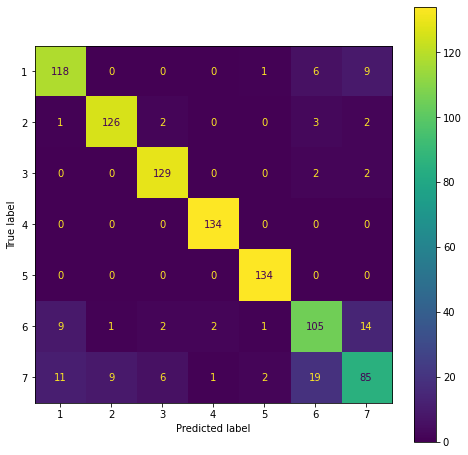

In [63]:
# Confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(svm_model_smote_1,x_test,y_test,ax=ax)
plt.savefig('model_1_smote_confusion_matrix.png')
plt.show()

## Model 2 | without fault group 7

In [64]:
df = pd.read_excel('../input/steel-plates-fault-dataset/Steel Plates Fault Dataset.xlsx',header=None)

# Convert columns 0 to 13 from intger to float
df.loc[:,:13] = df.loc[:,:13].astype('float64')

# Remove fault group 7
df = df.loc[df[33]!=1] # Remove smaples with fault group 7
df = df.loc[:,:32] # Remove fault group 7

# Split the data into independant(x) and dependant(y) variables dataframes for model-2
df_x = df.loc[:,0:26]
df_y = df.loc[:,27:32]

# Split the labels into their own groups
df_27 = df[27].loc[df[27]==1]
df_28 = df[28].loc[df[28]==1]
df_29 = df[29].loc[df[29]==1]
df_30 = df[30].loc[df[30]==1]
df_31 = df[31].loc[df[31]==1]
df_32 = df[32].loc[df[32]==1]

# Change the labling to 1 to 6 that corresponds to labels from 27 to 32
df_28 = df_28.where(df_28!=1, 2,axis=0)
df_29 = df_29.where(df_29!=1, 3,axis=0)
df_30 = df_30.where(df_30!=1, 4,axis=0)
df_31 = df_31.where(df_31!=1, 5,axis=0)
df_32 = df_32.where(df_32!=1, 6,axis=0)
frames = [df_27,df_28,df_29,df_30,df_31,df_32]
y = pd.concat(frames)

scaler = MinMaxScaler()
x = scaler.fit_transform(df_x)

x, y = SMOTE(random_state=7).fit_resample(x, y)

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=10,test_size=0.20,stratify=y)

In [65]:
svc = SVC(kernel='rbf')
svc_paramenters = {'C':[0.1,1,10,20,100],
                   'gamma':[0.1,1,10,100]}
svm_model_smote_2 = GridSearchCV(svc,param_grid=svc_paramenters,return_train_score=True,cv=10,scoring='accuracy')
svm_model_smote_2.fit(x_train,y_train)

print(f'''Best parameters:{svm_model_smote_2.best_params_}
Best score:{svm_model_smote_2.best_score_}
Accuracy score:{svm_model_smote_2.score(x_test,y_test)}
''')

Best parameters:{'C': 100, 'gamma': 1}
Best score:0.9506806282722513
Accuracy score:0.9517819706498952



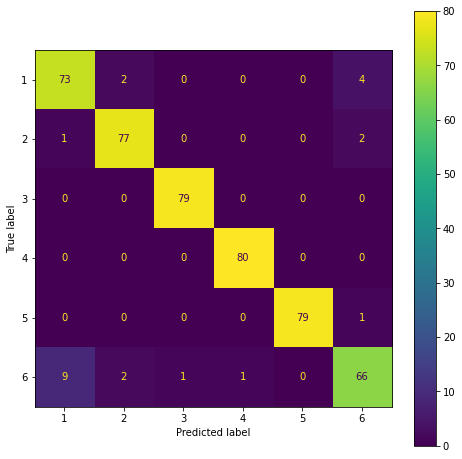

In [66]:
fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(svm_model_smote_2,x_test,y_test,ax=ax)
plt.savefig('model_2_smote_confusion_matrix.png')
plt.show()

## Model 3

In [67]:
# Read data
df = pd.read_excel('../input/steel-plates-fault-dataset/Steel Plates Fault Dataset.xlsx',header=None)

# Selecting only fault group 7
df = df.drop(columns=[27,28,29,30,31,32])

df_x = df.loc[:,:26]
y = df.loc[:,32:33]

# Downscaling
scaler = MinMaxScaler()
x = scaler.fit_transform(df_x)

# Oversampling
x, y = SMOTE(random_state=7).fit_resample(x,y)

# Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=10,test_size=0.20,stratify=y)
# Flatting data
y_train = np.ravel(y_train)

In [68]:
# Model selection
svc = SVC(kernel='rbf')
svc_paramenters = {'C':[0.1,1,10,20,100],
                   'gamma':[0.1,1,10,100]}
svm_model_smote_3 = GridSearchCV(svc,param_grid=svc_paramenters,return_train_score=True,cv=10,scoring='accuracy')
svm_model_smote_3.fit(x_train,y_train)

print(f'''Best parameters:{svm_model_smote_3.best_params_}
Best score:{svm_model_smote_3.best_score_}
Accuracy score:{svm_model_smote_3.score(x_test,y_test)}
''')

Best parameters:{'C': 100, 'gamma': 10}
Best score:0.8524355227400913
Accuracy score:0.8623481781376519



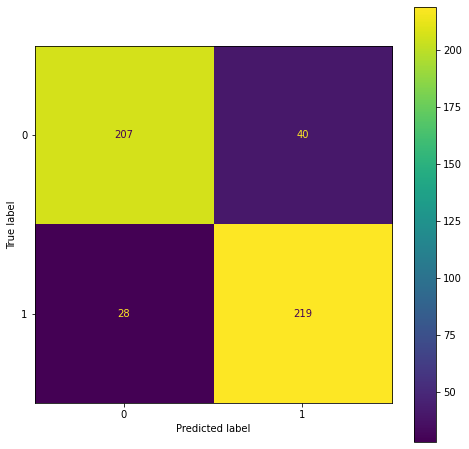

In [69]:
# Confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(svm_model_smote_3,x_test,y_test,ax=ax)
plt.savefig('model_3_smote_confusion_matrix.png')
plt.show()

# Validation

In [70]:
# Read data
df = pd.read_excel('../input/steel-plates-fault-dataset/Steel Plates Fault Dataset.xlsx',header=None)

# Convert columns 0 to 13 from intger to float
df.loc[:,:13] = df.loc[:,:13].astype('float64')

# Split the data into independant(x) and dependant(y) variables

df_x = df.loc[:,0:26]
df_y = df.loc[:,27:33]

# Split the labels into their own groups
df_27 = df[27].loc[df[27]==1]
df_28 = df[28].loc[df[28]==1]
df_29 = df[29].loc[df[29]==1]
df_30 = df[30].loc[df[30]==1]
df_31 = df[31].loc[df[31]==1]
df_32 = df[32].loc[df[32]==1]
df_33 = df[33].loc[df[33]==1]

# Change the labling to 1 to 7 that corresponds to labels from 27 to 33
df_28 = df_28.where(df_28!=1, 2,axis=0)
df_29 = df_29.where(df_29!=1, 3,axis=0)
df_30 = df_30.where(df_30!=1, 4,axis=0)
df_31 = df_31.where(df_31!=1, 5,axis=0)
df_32 = df_32.where(df_32!=1, 6,axis=0)
df_33 = df_33.where(df_33!=1, 7,axis=0)
frames = [df_27,df_28,df_29,df_30,df_31,df_32,df_33] # With group 7
y = pd.concat(frames)

# Over-sampling
#df_x, y = SMOTE(random_state=7).fit_resample(df_x, df_y)
#df_x.shape, y.shape

# Downscaling
scaler = MinMaxScaler()
x = scaler.fit_transform(df_x)

#Spliting data to train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=10,test_size=0.20,stratify=y)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1520, 27), (381, 27), (1520,), (381,))

In [71]:
# Number of samples to compare
test_sample = None

model_1_smote_pred = pd.DataFrame(svm_model_smote_1.predict(x_test[:test_sample]),columns=['Model 1'])
model_2_smote_pred = pd.DataFrame(svm_model_smote_2.predict(x_test[:test_sample]),columns=['Model 2'])
model_3_smote_pred = pd.DataFrame(convert_to_int(svm_model_smote_3.predict(x_test[:test_sample])),columns=['Model 3'])
vote_y = pd.DataFrame(vote(np.asarray(model_1_smote_pred),np.asarray(model_2_smote_pred),np.asarray(model_3_smote_pred)),columns=['Voting result'])
test_y = pd.DataFrame(np.asarray(y_test[:test_sample]),columns=['Actual value'])

In [72]:
pd.concat([model_1_smote_pred,model_2_smote_pred,model_3_smote_pred,vote_y,test_y],axis=1)

,Model 1,Model 2,Model 3,Voting result,Actual value
0,1,1,0,1,1
1,7,2,7,7,7
2,3,3,0,3,3
3,7,1,7,7,7
4,7,6,7,7,7
...,...,...,...,...,...
376,3,3,0,3,3
377,6,6,0,6,6
378,7,6,7,7,7
379,3,3,0,3,3


In [73]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score

In [74]:
accuracy_score(model_1_smote_pred,test_y)

0.9448818897637795

In [75]:
accuracy_score(vote_y,test_y)

0.926509186351706

In [76]:
accuracy_score(model_2_smote_pred,test_y)

0.6272965879265092

In [77]:
accuracy_score(model_3_smote_pred,test_y)

0.32545931758530183

In [78]:
vote_y.value_counts()

Voting result
7                114
6                 91
3                 79
1                 37
2                 36
4                 14
5                 10
dtype: int64

In [79]:
accuracy_score(vote_y,test_y)

0.926509186351706

AttributeError: type object 'ConfusionMatrixDisplay' has no attribute 'from_predictions'

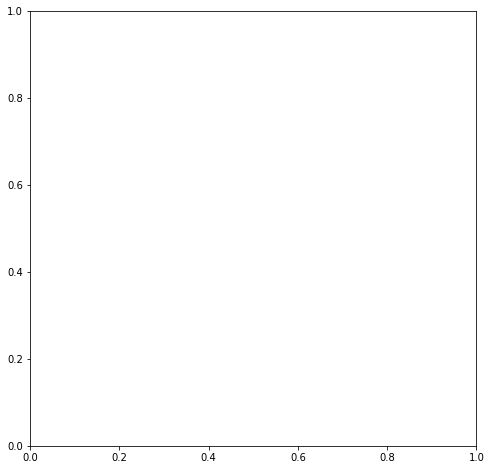

In [80]:
fig, ax = plt.subplots(figsize=(8,8))
ConfusionMatrixDisplay.from_predictions(vote_y, test_y,ax=ax)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
ConfusionMatrixDisplay.from_predictions(model_1_smote_pred, test_y,ax=ax)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
X, y = make_classification(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(
        X, y, random_state=0)
clf = SVC(random_state=0)
clf.fit(X_train, y_train)

ConfusionMatrixDisplay.from_estimator(
    clf, X_test, y_test)

plt.show()

In [ ]:
confusion_matrix(vote_y,test_y)